In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_words = 10000  # Number of most frequent words to consider as features 
timesteps = 500  # Maximum length of sequences
batch_size = 32  

print('Loading the data...')

train, test = imdb.load_data(num_words=max_words)

X_train = train[0]
y_train = train[1]
X_test = test[0]
y_test = test[1]

print('Total number of training samples/sequences:', len(X_train), '\n')
print('Total number of testing samples/sequences:', len(X_test), '\n')

Loading the data...
Total number of training samples/sequences: 25000 

Total number of testing samples/sequences: 25000 



In [2]:
# Auxiliary function to peek some data:
def dataset_report(data, labels, num_rows=5):
    print('First', num_rows, 'reviews:\n', data[0:num_rows], '\n')
    print('First', num_rows, 'labels:\n', labels[0:num_rows], '\n')

# Implement here sequence padding:
print('Padding sequences...')

X_train = sequence.pad_sequences(X_train, maxlen=timesteps)
X_test = sequence.pad_sequences(X_test, maxlen=timesteps)

print('Finished sequences!\n')

dataset_report(X_train, y_train)
dataset_report(X_test, y_test)


# Using all 50000 samples (25000 for training and 25000 for testing) would lead 
# to an expensive costs in terms of computational time when running the models. 
# Therefore, for practical purposes, both training and testing sets will be 
# reduced to 3000 samples each.
X_train = X_train[0:3000]
y_train = y_train[0:3000]
X_test = X_test[0:3000]
y_test = y_test[0:3000]

Padding sequences...
Finished sequences!

First 5 reviews:
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 [ 687   23    4 ...   21   64 2574]
 [   0    0    0 ...    7   61  113]] 

First 5 labels:
 [1 0 0 1 0] 

First 5 reviews:
 [[   0    0    0 ...   14    6  717]
 [   0    0    0 ...  125    4 3077]
 [  33    6   58 ...    9   57  975]
 [   0    0    0 ...   28  314 1772]
 [   0    0    0 ...  158  856  158]] 

First 5 labels:
 [0 1 1 0 1] 



In [3]:
# auxiliary functions to plot the results and to facilitate the comparison 
# between training and validation results.
import matplotlib.pyplot as plt

def plot_results(history):
    # Results analysis:
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, color='gray', label='Training acc')
    plt.plot(epochs, val_acc, color='green', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, color='gray', label='Training loss')
    plt.plot(epochs, val_loss, color='green', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    

def plot_models_comparison(rnn_history, lstm_history, metric='acc'):
    val_metric = 'val_' + metric
        
    rnn_train_values = rnn_history.history[metric]
    rnn_val_values = rnn_history.history[val_metric]
    lstm_train_values = lstm_history.history[metric]
    lstm_val_values = lstm_history.history[val_metric]
        
    epochs = range(1, len(rnn_train_values) + 1)
        
    plt.plot(epochs, rnn_train_values, color='blue', label='Training RNN')
    plt.plot(epochs, lstm_train_values, color='red', label='Training LSTM')
    
    plt.title('Training ' + metric)
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, rnn_val_values, color='blue', label='Validation RNN')
    plt.plot(epochs, lstm_val_values, color='red', label='Validation LSTM')
    
    plt.title('Validation ' + metric)
    plt.legend()
    plt.figure()

In [4]:
# Shared attributes across models:
output_activation_function = 'sigmoid'  # other options: softmax
hidden_activation_function = 'relu'  # other options: tanh, sigmoid, hard_sigmoid

# Shared attributes for compile:
loss_function = 'binary_crossentropy'
optimizer = 'adam'  # other options: rmsprop, sgd, adagrad, adamax
metric = 'acc'

# Shared attributes for fit:
steps_per_epoch = 20
epochs = 10
validation_steps = 5
validation_split = 0.1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 28)          280000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 28)                1596      
                                                                 
 dense (Dense)               (None, 1)                 29        
                                                                 
Total params: 281,625
Trainable params: 281,625
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
20/20 [==============================] - 2s 88ms/step - loss: 0.6914 - acc: 0.5148 - val_loss: 0.6686 - val_acc: 0.6200
Epoch 2/10
20/20 [==============================] - 2s 82ms/step - loss: 0.5879 - acc: 0.7419 - val_loss: 0.6003 - val_acc: 0.7367
Epoch 3/10
20/20 [==============================] - 

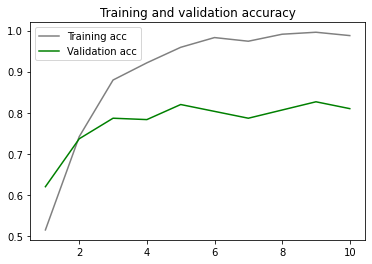

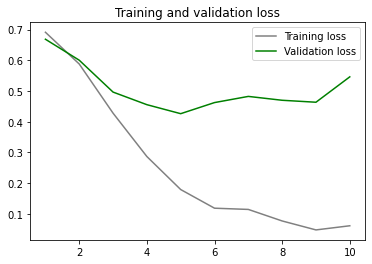

In [5]:
# Define LSTM's architecture here:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding

rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=max_words, output_dim=28))
rnn_model.add(SimpleRNN(units=28))
rnn_model.add(Dense(1, activation=output_activation_function))

rnn_model.compile(loss=loss_function, optimizer=optimizer, metrics=[metric])
rnn_model.summary()

history_rnn_model = rnn_model.fit(X_train, 
                                  y_train,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_split=validation_split,
                                  validation_steps=validation_steps,
                                  epochs=epochs,
                                  shuffle=True)

rnn_model.save('rnn_model.h5')

plot_results(history_rnn_model)

In [6]:
# Evaluating the model with unseen data:
evaluation = rnn_model.evaluate(X_test, y_test)
print('Test Loss: ', evaluation[0], '\nTest Accuracy: ', evaluation[1])

94/94 [==============================] - 2s 17ms/step - loss: 0.5697 - acc: 0.7827
Test Loss:  0.5697294473648071 
Test Accuracy:  0.7826666831970215


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 28)          280000    
                                                                 
 lstm (LSTM)                 (None, 28)                6384      
                                                                 
 dense_1 (Dense)             (None, 1)                 29        
                                                                 
Total params: 286,413
Trainable params: 286,413
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
20/20 [==============================] - 5s 181ms/step - loss: 0.6924 - acc: 0.5104 - val_loss: 0.6883 - val_acc: 0.5633
Epoch 2/10
20/20 [==============================] - 3s 147ms/step - loss: 0.6835 - acc: 0.5463 - val_loss: 0.6727 - val_acc: 0.6200
Epoch 3/10
20/20 [==============================

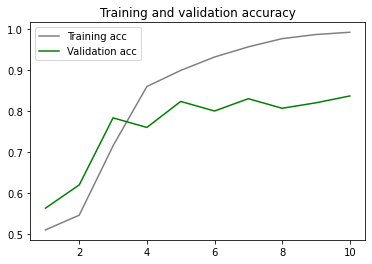

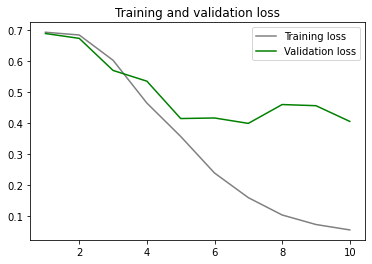

In [7]:
####### LSTM ###########

# Define LSTM's architecture here:
from tensorflow.keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=28))
lstm_model.add(LSTM(units=28))
lstm_model.add(Dense(1, activation=output_activation_function))

lstm_model.compile(loss=loss_function, optimizer=optimizer, metrics=[metric])
lstm_model.summary()

history_lstm_model = lstm_model.fit(X_train, 
                                    y_train,
                                    steps_per_epoch=steps_per_epoch,
                                    validation_split=validation_split,
                                    validation_steps=validation_steps,
                                    epochs=epochs,
                                    shuffle=True)

lstm_model.save('lstm_model.h5')

# Plotting the results:
plot_results(history_lstm_model)

94/94 [==============================] - 6s 53ms/step - loss: 0.4478 - acc: 0.8287
Test Loss:  0.4478454887866974 
Test Accuracy:  0.8286666870117188


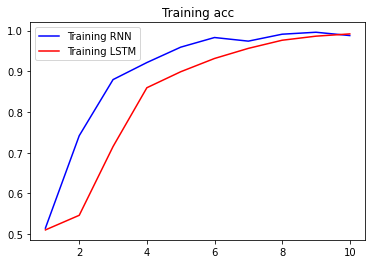

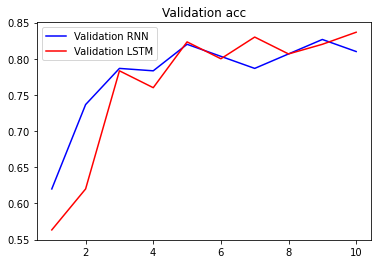

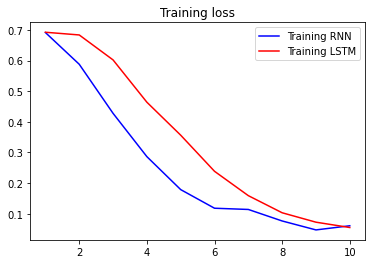

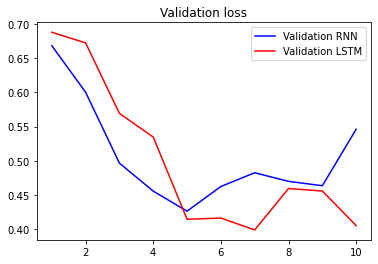

<Figure size 432x288 with 0 Axes>

In [8]:
# Evaluating the model with unseen data:
evaluation = lstm_model.evaluate(X_test, y_test)
print('Test Loss: ', evaluation[0], '\nTest Accuracy: ', evaluation[1])

# Comparing the two models regarding accuracy:
plot_models_comparison(history_rnn_model, history_lstm_model)

# Comparing the two models regarding loss:
plot_models_comparison(history_rnn_model, history_lstm_model, metric='loss')

In [11]:
#### Adding More Layers

# Build network with two simple RNN layers:
double_rnn_model = Sequential()
double_rnn_model.add(Embedding(input_dim=max_words, output_dim=28))
double_rnn_model.add(SimpleRNN(units=28, return_sequences=True))
double_rnn_model.add(SimpleRNN(units=28))
double_rnn_model.add(Dense(1, activation=output_activation_function))

double_rnn_model.compile(loss=loss_function, optimizer=optimizer, metrics=[metric])

double_rnn_model.fit(X_train, 
                     y_train,
                     steps_per_epoch=steps_per_epoch,
                     validation_split=0.25,
                     validation_steps=validation_steps,
                     epochs=epochs,
                     shuffle=True)


print('Original results from simpler RNN model:')
original_eval = rnn_model.evaluate(X_test, y_test)
print('Test loss: ', original_eval[0], '\nTest accuracy: ', original_eval[1])
print('\nNew model results:')
evaluation = double_rnn_model.evaluate(X_test, y_test)
print('Test loss: ', evaluation[0], '\nTest accuracy: ', evaluation[1])


# Build network with dropout

dropout_rnn_model = Sequential()
dropout_rnn_model.add(Embedding(input_dim=max_words, output_dim=28))
dropout_rnn_model.add(SimpleRNN(units=28, dropout=0.5, return_sequences=True))  # dropout: fraction of units to drop for the linear transformation of the inputs
dropout_rnn_model.add(SimpleRNN(units=28, recurrent_dropout=0.15))  # recurrent_dropout: fraction of units to drop for the linear transformation of the recurrent state
dropout_rnn_model.add(Dense(1, activation=output_activation_function))

dropout_rnn_model.compile(loss=loss_function, optimizer=optimizer, metrics=[metric])

history_dropout_rnn_model = dropout_rnn_model.fit(X_train, 
                      y_train,
                      steps_per_epoch=(steps_per_epoch*2),
                      validation_split=0.25,
                      validation_steps=validation_steps,
                      epochs=epochs,
                      shuffle=True)


print('Original results from simpler RNN model:')
original_eval = rnn_model.evaluate(X_test, y_test)
print('Test loss: ', original_eval[0], '\nTest accuracy: ', original_eval[1])
print('\nNew model results:')
evaluation = dropout_rnn_model.evaluate(X_test, y_test)
print('Test loss: ', evaluation[0], '\nTest accuracy: ', evaluation[1])

Epoch 1/10
20/20 [==============================] - 4s 157ms/step - loss: 0.7003 - acc: 0.5111 - val_loss: 0.6952 - val_acc: 0.5040
Epoch 2/10
20/20 [==============================] - 3s 139ms/step - loss: 0.6513 - acc: 0.6284 - val_loss: 0.7068 - val_acc: 0.4773
Epoch 3/10
20/20 [==============================] - 3s 138ms/step - loss: 0.4848 - acc: 0.8187 - val_loss: 0.8673 - val_acc: 0.5000
Epoch 4/10
20/20 [==============================] - 3s 143ms/step - loss: 0.2135 - acc: 0.9378 - val_loss: 1.0006 - val_acc: 0.4880
Epoch 5/10
20/20 [==============================] - 3s 144ms/step - loss: 0.0862 - acc: 0.9858 - val_loss: 1.1668 - val_acc: 0.4920
Epoch 6/10
20/20 [==============================] - 3s 139ms/step - loss: 0.0331 - acc: 0.9987 - val_loss: 1.3965 - val_acc: 0.5120
Epoch 7/10
20/20 [==============================] - 3s 140ms/step - loss: 0.0171 - acc: 0.9991 - val_loss: 1.5080 - val_acc: 0.5000
Epoch 8/10
20/20 [==============================] - 3s 145ms/step - loss: 0.

In [12]:
# Build network with two LSTM layers
double_lstm_model = Sequential()
double_lstm_model.add(Embedding(input_dim=max_words, output_dim=28))
double_lstm_model.add(LSTM(units=28, return_sequences=True))
double_lstm_model.add(LSTM(units=28))
double_lstm_model.add(Dense(1, activation=output_activation_function))

double_lstm_model.compile(loss=loss_function, optimizer=optimizer, metrics=[metric])

history_double_lstm_model = double_lstm_model.fit(X_train, 
                     y_train,
                     steps_per_epoch=steps_per_epoch,
                     validation_split=0.25,
                     validation_steps=validation_steps,
                     epochs=epochs,
                     shuffle=True)


print('Original results from simpler LSTM model:')
original_eval = lstm_model.evaluate(X_test, y_test)
print('Test loss: ', original_eval[0], '\nTest accuracy: ', original_eval[1])
print()
print('New model results:')
evaluation = double_lstm_model.evaluate(X_test, y_test)
print('Test loss: ', evaluation[0], '\nTest accuracy: ', evaluation[1])

Epoch 1/10
20/20 [==============================] - 12s 506ms/step - loss: 0.6924 - acc: 0.5107 - val_loss: 0.6913 - val_acc: 0.5107
Epoch 2/10
20/20 [==============================] - 9s 459ms/step - loss: 0.6769 - acc: 0.5387 - val_loss: 0.6467 - val_acc: 0.6347
Epoch 3/10
20/20 [==============================] - 9s 468ms/step - loss: 0.5125 - acc: 0.7898 - val_loss: 0.5365 - val_acc: 0.7133
Epoch 4/10
20/20 [==============================] - 10s 489ms/step - loss: 0.2815 - acc: 0.8987 - val_loss: 0.5159 - val_acc: 0.7707
Epoch 5/10
20/20 [==============================] - 10s 524ms/step - loss: 0.1299 - acc: 0.9622 - val_loss: 0.5524 - val_acc: 0.7773
Epoch 6/10
20/20 [==============================] - 10s 512ms/step - loss: 0.0660 - acc: 0.9853 - val_loss: 0.5763 - val_acc: 0.7827
Epoch 7/10
20/20 [==============================] - 10s 509ms/step - loss: 0.0325 - acc: 0.9956 - val_loss: 0.6451 - val_acc: 0.7827
Epoch 8/10
20/20 [==============================] - 9s 458ms/step - los

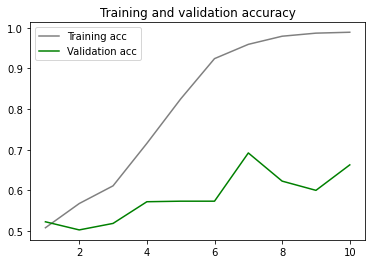

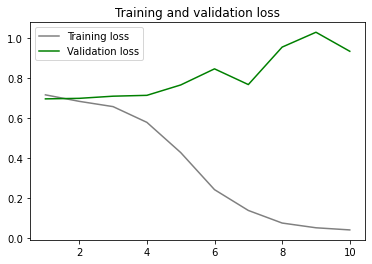

In [13]:
plot_results(history_dropout_rnn_model)

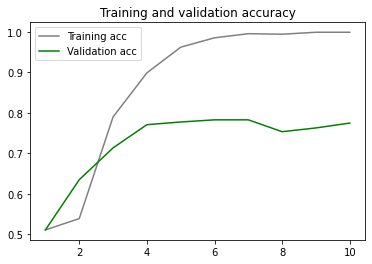

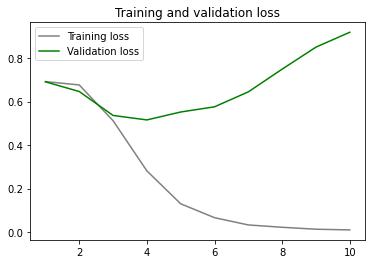

In [14]:
plot_results(history_double_lstm_model)